# Matplotlib作业

## 四、散点图作业要求：
- 1.把guazi_bj（北京）、guazi_gz（广州）、guazi_sh（上海）、guazi_sz（深圳）二手车的数据归类在一个DataFrame中。
- 2.新增车辆使用年份（use_year）与保值率（hedge_rate）两个字段。其中使用年份的计算是把当前的时间减去购买的时间，然后再转换成年；保值率的计算是将二手车的价格/新车的价格。
- 3.把二手车使用年份与保值率（二手车价/新车价格）绘制成散点图，观察他们的分布情况。
- 4.把二手车的行驶距离与保值率（二手车价/新车价格）绘制成散点图，观察他们的分布情况。 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df_bj = pd.read_csv('guazi_bj.csv')
df_gz = pd.read_csv('guazi_gz.csv')
df_sh = pd.read_csv('guazi_sh.csv')
df_sz = pd.read_csv('guazi_sz.csv')
df = pd.concat([df_bj, df_gz, df_sh, df_sz], axis=0)
df.head()

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,大众 宝来 2014款 1.6L 自动时尚型,一汽-大众,2014-08,3.82,自动,1.6L,8.0,13.0,北京,2014款,紧凑型,0,105马力,汽油,4523,1775,1467,NaN,前置前驱
1,福特 福睿斯 2015款 1.5L 自动时尚型,长安福特,2015-12,2.35,自动,1.5L,7.8,13.0,北京,2015款,紧凑型,0,113马力,汽油,4587,1825,1490,NaN,前置前驱
2,大众 速腾 2012款 1.6L 自动舒适型,一汽-大众,2012-05,6.67,自动,1.6L,7.0,16.4,北京,2012款,紧凑型,0,105马力,汽油,4644,1778,1482,NaN,前置前驱
3,奔驰C级 2011款 C 200 CGI 时尚型,北京奔驰,2013-01,11.83,自动,1.8T,15.0,42.1,北京,2011款,中型,0,184马力,汽油,4591,1770,1444,NaN,前置后驱
4,大众 帕萨特 2013款 2.0TSI DSG御尊版,上汽大众,2013-11,8.95,自动,2.0T,13.0,27.7,北京,2013款,中型,0,200马力,汽油,4870,1834,1472,NaN,前置前驱


In [3]:
def get_use_year(v):
    if isinstance(v, str):
        v = datetime.strptime(v,"%Y-%m")
        now = datetime.now()
        g_u_y = (now-v).total_seconds()/60/60/24/365
        return g_u_y
df["use_year"] = df["buy_time"].apply(get_use_year)
df["hedge_rate"] = df["es_price"]/df["new_price"]
df

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,...,suv,horsepower,fuel,length,width,height,owners,drive,use_year,hedge_rate
0,大众 宝来 2014款 1.6L 自动时尚型,一汽-大众,2014-08,3.82,自动,1.6L,8.00,13.00,北京,2014款,...,0,105马力,汽油,4523,1775,1467,NaN,前置前驱,5.549388,0.615385
1,福特 福睿斯 2015款 1.5L 自动时尚型,长安福特,2015-12,2.35,自动,1.5L,7.80,13.00,北京,2015款,...,0,113马力,汽油,4587,1825,1490,NaN,前置前驱,4.215142,0.600000
2,大众 速腾 2012款 1.6L 自动舒适型,一汽-大众,2012-05,6.67,自动,1.6L,7.00,16.40,北京,2012款,...,0,105马力,汽油,4644,1778,1482,NaN,前置前驱,7.801443,0.426829
3,奔驰C级 2011款 C 200 CGI 时尚型,北京奔驰,2013-01,11.83,自动,1.8T,15.00,42.10,北京,2011款,...,0,184马力,汽油,4591,1770,1444,NaN,前置后驱,7.130210,0.356295
4,大众 帕萨特 2013款 2.0TSI DSG御尊版,上汽大众,2013-11,8.95,自动,2.0T,13.00,27.70,北京,2013款,...,0,200马力,汽油,4870,1834,1472,NaN,前置前驱,6.297333,0.469314
5,哈弗H6 2011款 2.0L 手动两驱精英型,长城汽车,2012-11,5.17,手动,2.0L,4.50,11.50,北京,2011款,...,1,133马力,汽油,4640,1825,1690,NaN,前置前驱,7.297333,0.391304
6,起亚K3 2013款 1.6L 自动GLS,东风悦达起亚,2014-07,6.58,自动,1.6L,7.00,13.50,北京,2013款,...,0,128马力,汽油,4600,1780,1445,NaN,前置前驱,5.634320,0.518519
7,奔驰C级 2011款 C 200 CGI 时尚型,北京奔驰,2012-08,7.33,自动,1.8T,16.00,42.10,北京,2011款,...,0,184马力,汽油,4591,1770,1444,NaN,前置后驱,7.549388,0.380048
8,奔驰E级 2015款 改款 E 260 L,北京奔驰,2016-01,10.36,自动,2.0T,32.00,53.00,北京,2015款,...,0,211马力,汽油,5024,1854,1477,NaN,前置后驱,4.130210,0.603774
9,本田 缤智 2016款 1.8L CVT两驱先锋型,广汽本田,2016-08,0.87,自动,1.8L,12.50,16.70,北京,2016款,...,1,136马力,汽油,4294,1772,1605,NaN,前置前驱,3.546648,0.748503


In [4]:
df1 = df[['use_year', 'km', 'hedge_rate']]
df1.head()

,use_year,km,hedge_rate
0,5.549388,3.82,0.615385
1,4.215142,2.35,0.600000
2,7.801443,6.67,0.426829
3,7.130210,11.83,0.356295
4,6.297333,8.95,0.469314


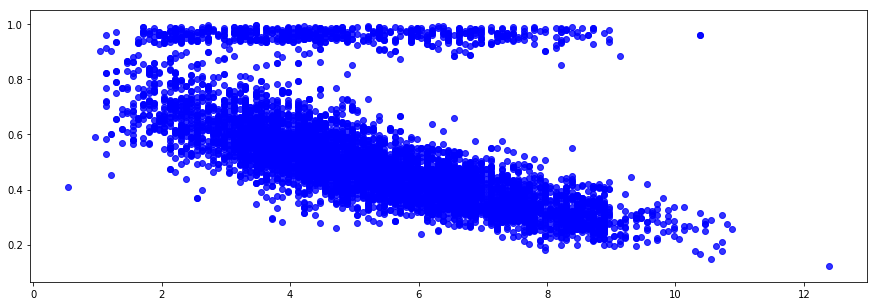

In [5]:
plt.figure(figsize=(15, 5))
plt.scatter(df1['use_year'], df1['hedge_rate'] , c='b', alpha=0.8)

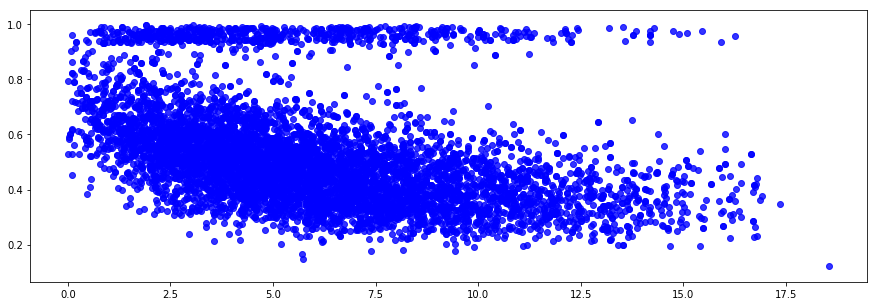

In [6]:
plt.figure(figsize=(15, 5))
plt.scatter(df1['km'], df1['hedge_rate'] , c='b', alpha=0.8)

# 观察结果：
1. 通过以上分析，我们可以看到汽车的保值率是随着使用年份和行驶公里数的增加呈现线性下降的。
2. 有一部分数据引起我们的注意，就是保值率大于0.9，并且使用年份和行驶公里数都比较大的数据，我们可以看出这类数据基本上可以算是异常数据了，因此以后在分析的时候就可以处理掉这部分数据了。

In [17]:
# 异常数据1
df[(df1['use_year'] > 5) & (df1['hedge_rate'] > 0.9)][['es_price', 'new_price', 'use_year', 'hedge_rate']].head()

,es_price,new_price,use_year,hedge_rate
21,10.03,10.19,6.045279,0.984298
24,5.19,5.30,5.968566,0.979245
30,3.15,3.30,8.132950,0.954545
39,10.00,10.24,6.801443,0.976562
51,20.60,20.81,5.382265,0.989909


In [18]:
# 异常数据2
df[(df1['km'] > 5) & (df1['hedge_rate'] > 0.9)][['es_price', 'new_price', 'km', 'hedge_rate']].head()

,es_price,new_price,km,hedge_rate
21,10.03,10.19,7.21,0.984298
30,3.15,3.30,11.26,0.954545
34,9.70,10.10,7.21,0.960396
39,10.00,10.24,6.86,0.976562
51,20.60,20.81,6.69,0.989909
